In [1]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.5.3


In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
X_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_train.csv', encoding = 'unicode_escape')
X_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_test.csv', encoding = 'unicode_escape')

y_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_train.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)
y_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_test.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)

In [5]:
from sklearn.preprocessing import MinMaxScaler

Escalado de 0 a 1 con:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

In [6]:
minMaxScaler = MinMaxScaler()
features = ['BMI', 'SleepTime', 'PhysicalHealth', 'MentalHealth']

x_a_escalar_train = X_train.loc[:,features].values
x_a_escalar_train = minMaxScaler.fit_transform(x_a_escalar_train)
x_train_data_escalada = pd.DataFrame(data = x_a_escalar_train, columns = features)
X_train['BMI'] = x_train_data_escalada['BMI']
X_train['SleepTime'] = x_train_data_escalada['SleepTime']
X_train['PhysicalHealth'] = x_train_data_escalada['PhysicalHealth']
X_train['MentalHealth'] = x_train_data_escalada['MentalHealth']

x_a_escalar_test = X_test.loc[:,features].values
x_a_escalar_test = minMaxScaler.transform(x_a_escalar_test)
x_test_data_escalada = pd.DataFrame(data = x_a_escalar_test, columns = features)
X_test['BMI'] = x_test_data_escalada['BMI']
X_test['SleepTime'] = x_test_data_escalada['SleepTime']
X_test['PhysicalHealth'] = x_test_data_escalada['PhysicalHealth']
X_test['MentalHealth'] = x_test_data_escalada['MentalHealth']

In [7]:
len(X_train), len(X_test)

(38312, 16422)

In [8]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input

2023-07-08 13:50:38.123777: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 13:50:38.441915: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 13:50:38.444380: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 13:50:40.160600: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
from tensorflow.keras.optimizers import Adam

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
from tensorflow.keras.utils import set_random_seed

In [12]:
import tensorflow as tf

In [13]:
set_random_seed(10)

In [14]:
model = Sequential([
    Dense(1000, activation="tanh", input_shape=(25,)),
    Dense(100, activation="tanh"),
    Dense(10, activation="tanh"),
    Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              26000     
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 127121 (496.57 KB)
Trainable params: 127121 (496.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.Recall()])

In [16]:
early_stopper = EarlyStopping(patience=15, restore_best_weights=True, monitor = "val_loss")

In [17]:
model.fit(X_train, 
          y_train, 
          epochs=100, 
          batch_size=300, 
          callbacks=[early_stopper],
          validation_split=0.15)

Epoch 1/100
109/109 [==============================] - 3s 15ms/step - loss: 0.5771 - recall: 0.4995 - val_loss: 0.7552 - val_recall: 0.5312
Epoch 2/100
109/109 [==============================] - 1s 9ms/step - loss: 0.5402 - recall: 0.5933 - val_loss: 0.6539 - val_recall: 0.6276
Epoch 3/100
109/109 [==============================] - 1s 8ms/step - loss: 0.5328 - recall: 0.6140 - val_loss: 0.7058 - val_recall: 0.5904
Epoch 4/100
109/109 [==============================] - 1s 8ms/step - loss: 0.5246 - recall: 0.6248 - val_loss: 0.6951 - val_recall: 0.6078
Epoch 5/100
109/109 [==============================] - 1s 8ms/step - loss: 0.5159 - recall: 0.6402 - val_loss: 0.7006 - val_recall: 0.6081
Epoch 6/100
109/109 [==============================] - 1s 8ms/step - loss: 0.5081 - recall: 0.6596 - val_loss: 0.6376 - val_recall: 0.6699
Epoch 7/100
109/109 [==============================] - 1s 9ms/step - loss: 0.5029 - recall: 0.6701 - val_loss: 0.6348 - val_recall: 0.6708
Epoch 8/100
109/109 [=====

In [18]:
model_1 = Sequential([
    Dense(1000, activation="relu", input_shape=(25,)),
    Dense(100, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              26000     
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 127121 (496.57 KB)
Trainable params: 127121 (496.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model_1.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.Recall()])

In [20]:
early_stopper = EarlyStopping(patience=15, restore_best_weights=True, monitor = "val_loss")

In [21]:
model_1.fit(X_train, 
          y_train, 
          epochs=100, 
          batch_size=300, 
          callbacks=[early_stopper],
          validation_split=0.15)

Epoch 1/100
109/109 [==============================] - 2s 14ms/step - loss: 0.5940 - recall_1: 0.4352 - val_loss: 0.7523 - val_recall_1: 0.5533
Epoch 2/100
109/109 [==============================] - 1s 8ms/step - loss: 0.5242 - recall_1: 0.6238 - val_loss: 0.6333 - val_recall_1: 0.6494
Epoch 3/100
109/109 [==============================] - 1s 8ms/step - loss: 0.5054 - recall_1: 0.6519 - val_loss: 0.6625 - val_recall_1: 0.6297
Epoch 4/100
109/109 [==============================] - 1s 8ms/step - loss: 0.4941 - recall_1: 0.6660 - val_loss: 0.6461 - val_recall_1: 0.6612
Epoch 5/100
109/109 [==============================] - 1s 8ms/step - loss: 0.4879 - recall_1: 0.6857 - val_loss: 0.6642 - val_recall_1: 0.6529
Epoch 6/100
109/109 [==============================] - 1s 8ms/step - loss: 0.4844 - recall_1: 0.7000 - val_loss: 0.6158 - val_recall_1: 0.7004
Epoch 7/100
109/109 [==============================] - 1s 8ms/step - loss: 0.4823 - recall_1: 0.7083 - val_loss: 0.6111 - val_recall_1: 0.701

In [22]:
preds = model.predict(X_test)

514/514 [==============================] - 1s 2ms/step


In [23]:
preds_1 = model_1.predict(X_test)

514/514 [==============================] - 1s 2ms/step


In [24]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [25]:
def treshold_05(x):
  if x > 0.5:
    return 1
  return 0

In [26]:
preds_05 = np.vectorize(treshold_05)(preds)
preds_1_05 = np.vectorize(treshold_05)(preds_1)

In [27]:
recall_score(y_test, preds_05)

0.7444890999878212

In [28]:
accuracy_score(y_test, preds_05)

0.7601388381439532

In [29]:
recall_score(y_test, preds_1_05)

0.7549628547071002

In [30]:
accuracy_score(y_test, preds_1_05)

0.7589209596882232

In [31]:
cm_05 = confusion_matrix(y_test, preds_05)

In [32]:
cm_1_05 = confusion_matrix(y_test, preds_1_05)

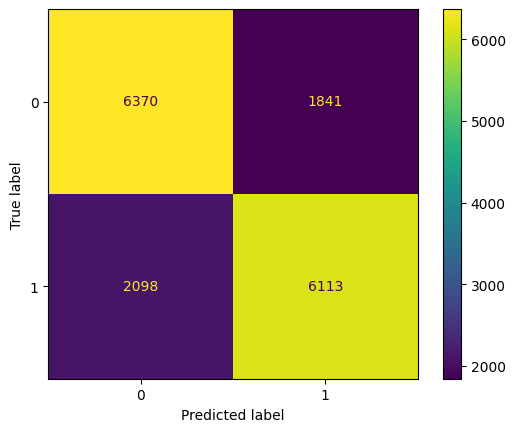

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_05)
disp.plot()

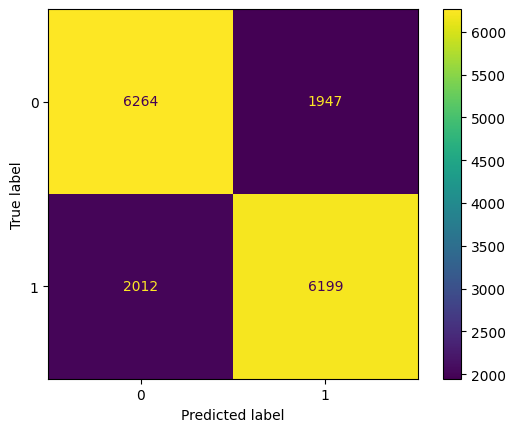

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1_05)
disp.plot()

In [35]:
def treshold_03(x):
  if x > 0.3:
    return 1
  return 0

In [36]:
preds_03 = np.vectorize(treshold_03)(preds)
preds_1_03 = np.vectorize(treshold_03)(preds_1)

In [37]:
recall_score(y_test, preds_03)

0.8984289367921081

In [38]:
accuracy_score(y_test, preds_03)

0.7485080988917306

In [39]:
recall_score(y_test, preds_1_03)

0.8885641213006942

In [40]:
accuracy_score(y_test, preds_1_03)

0.7545365972475947

In [41]:
cm_03 = confusion_matrix(y_test, preds_03)

In [42]:
cm_1_03 = confusion_matrix(y_test, preds_1_03)

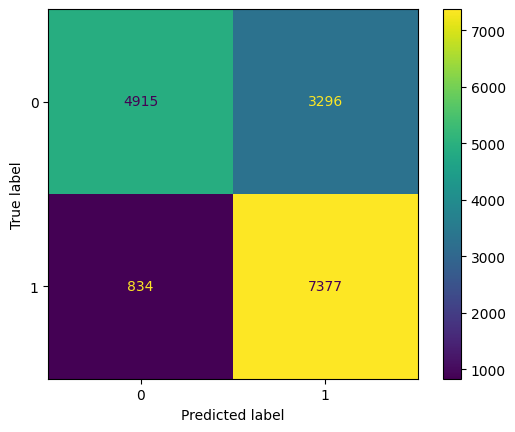

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_03)
disp.plot()

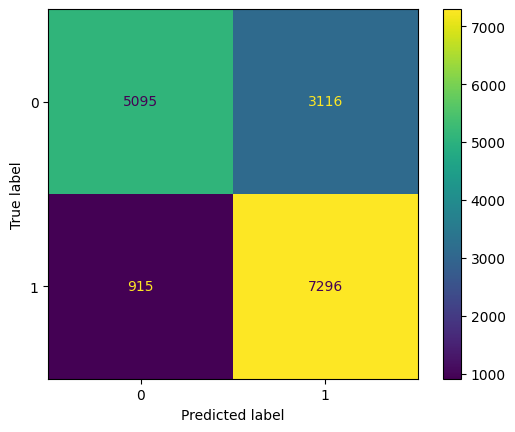

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1_03)
disp.plot()